In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('Healthcare-Diabetes.csv')
data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
data=data.drop(['Id'],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


<Axes: >

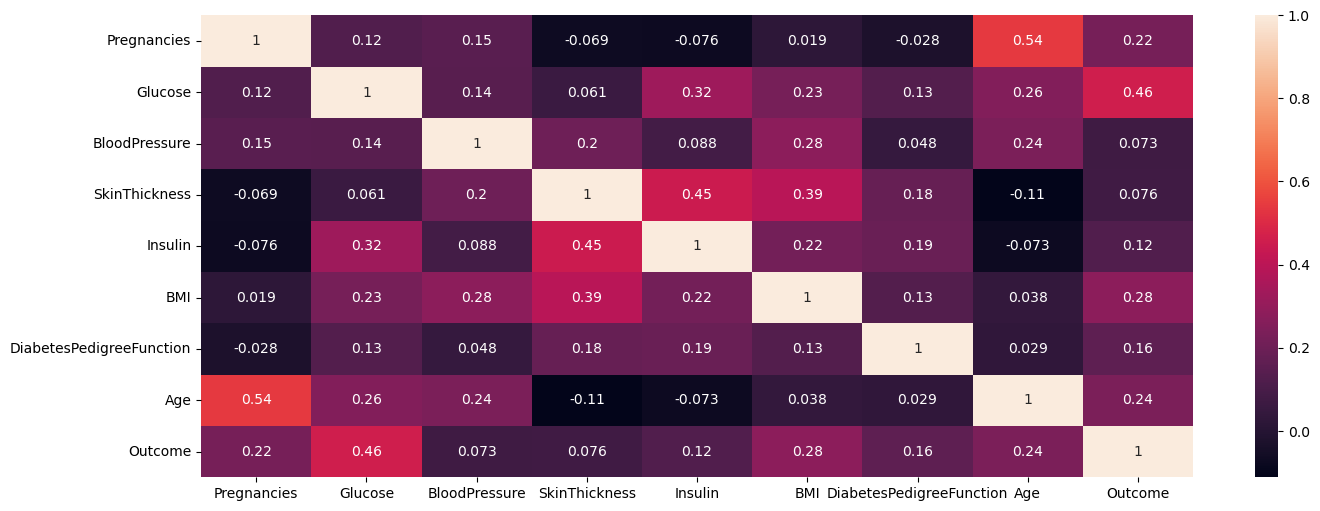

In [4]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

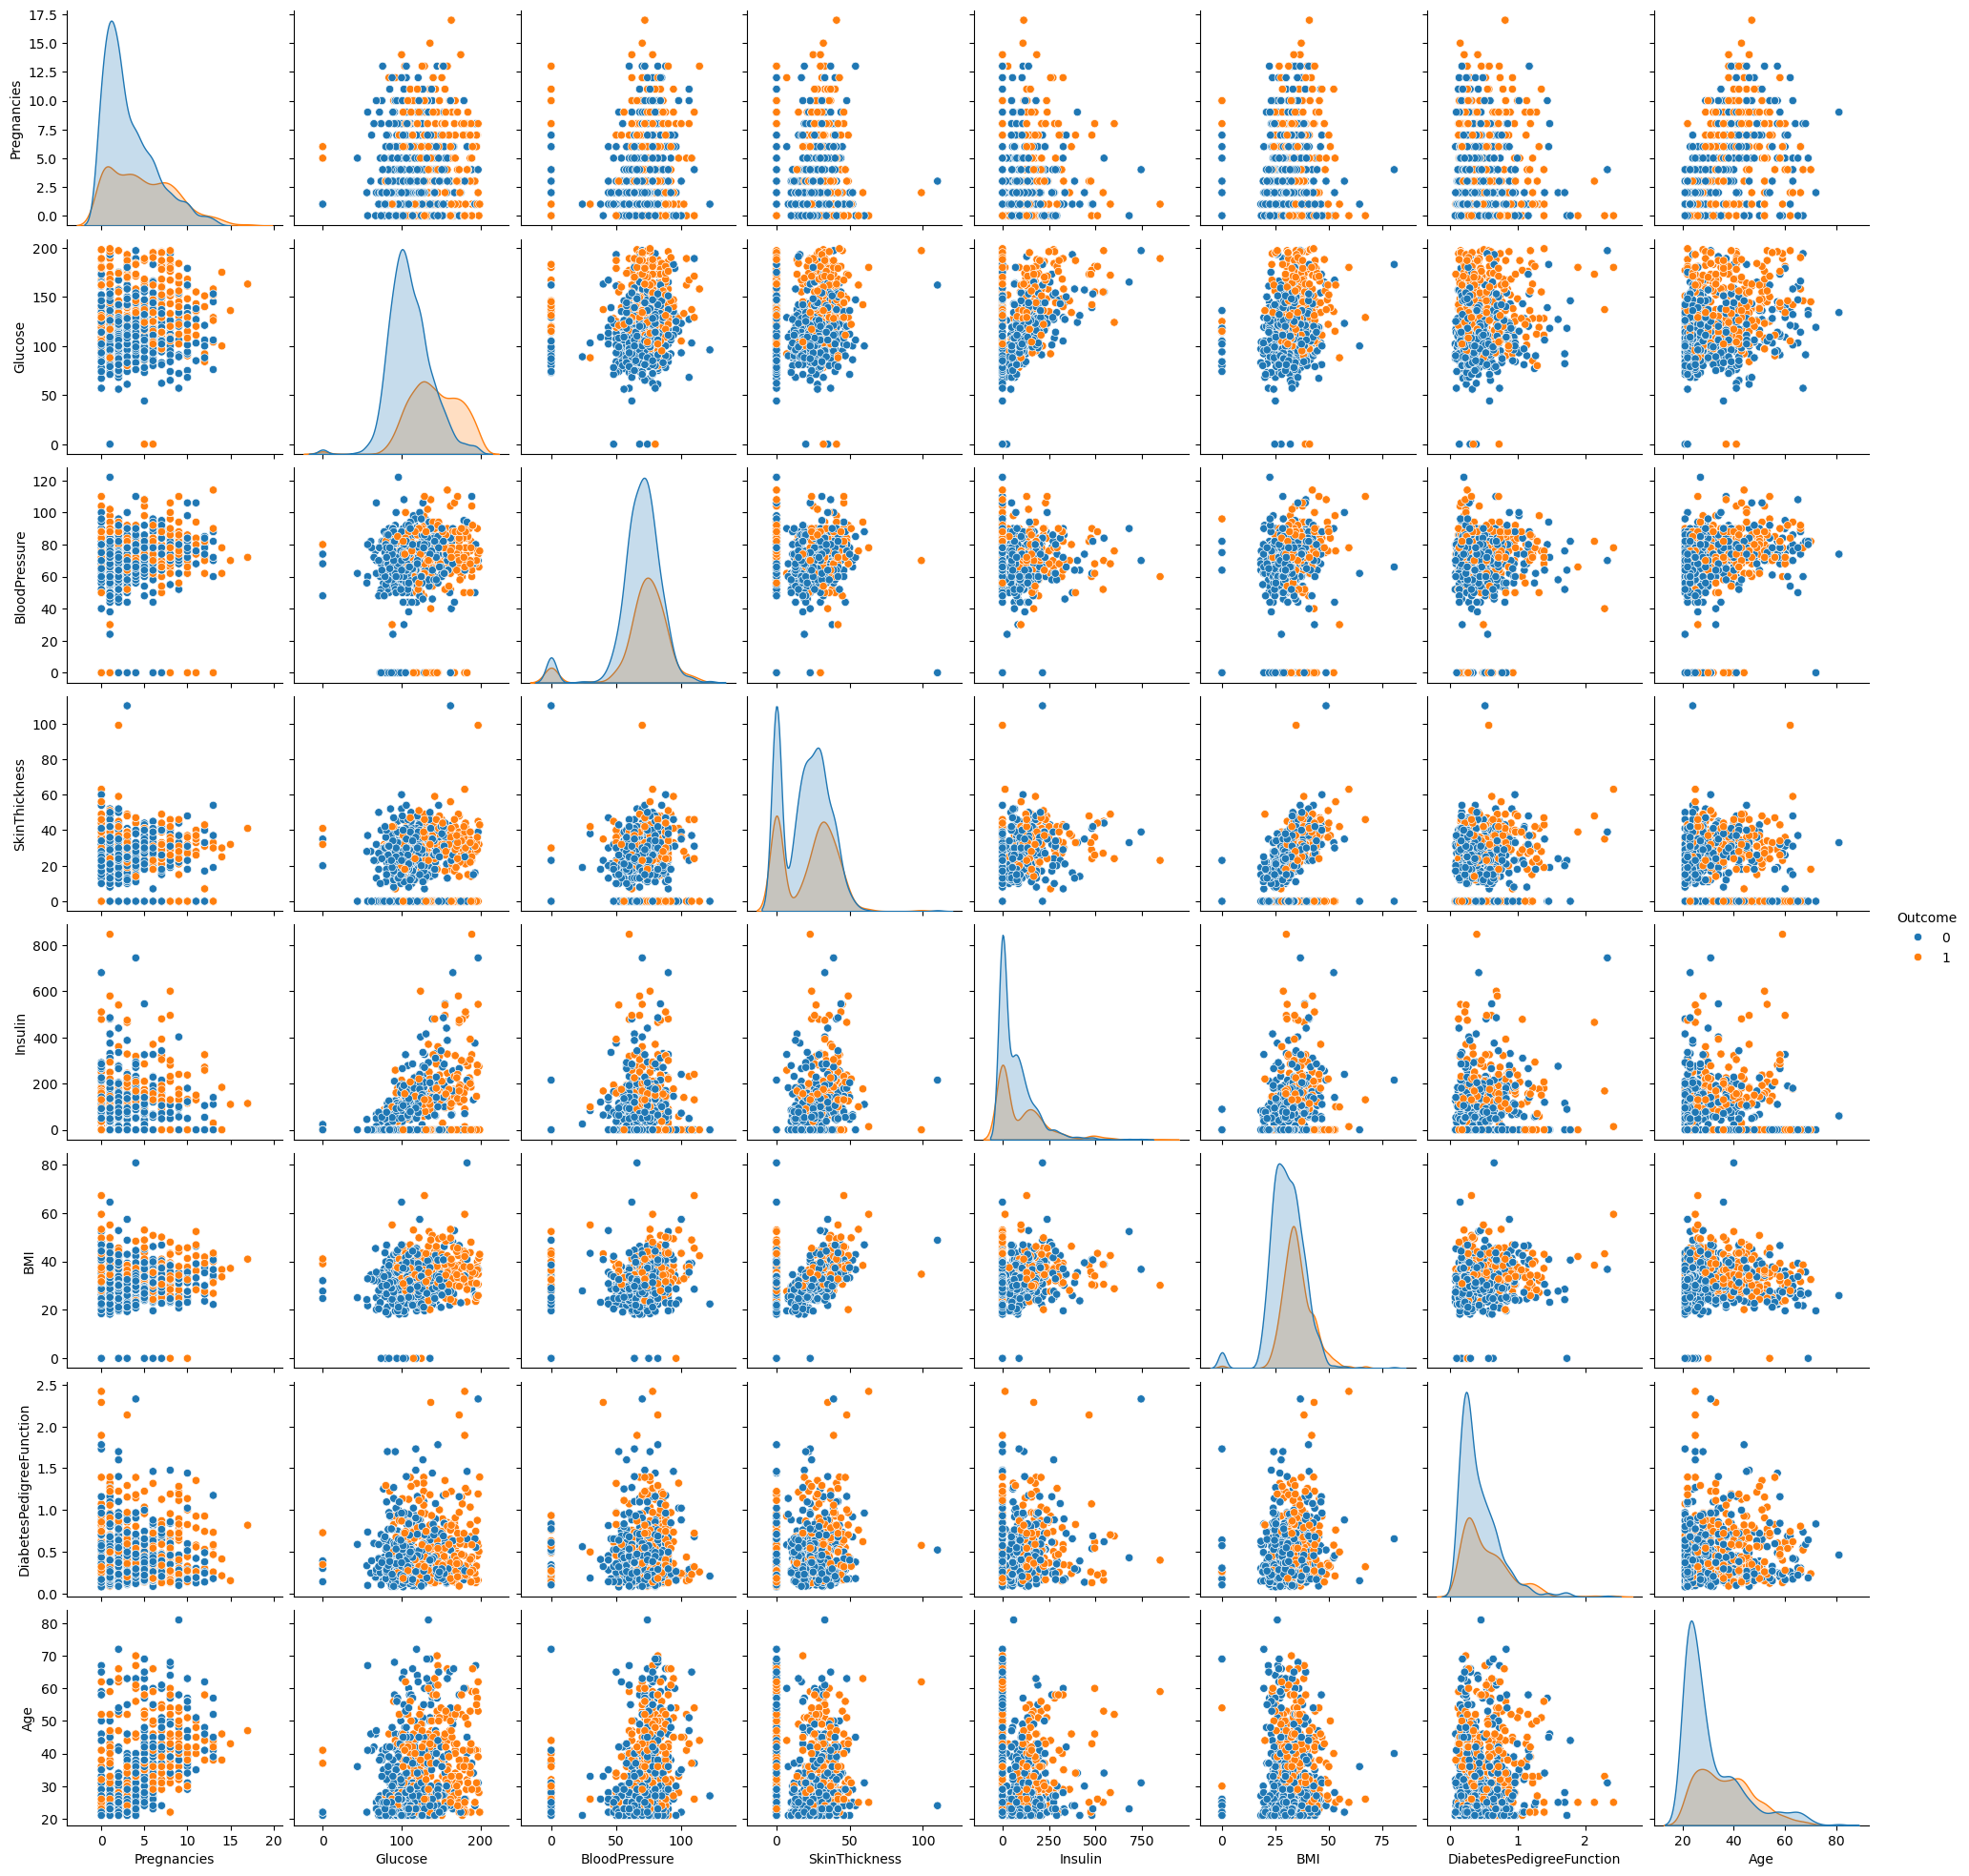

In [5]:
sns.pairplot(data,hue='Outcome')

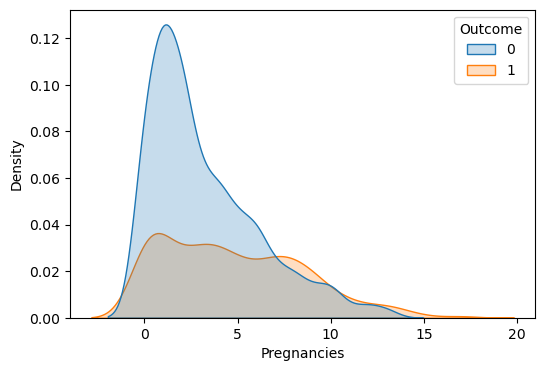

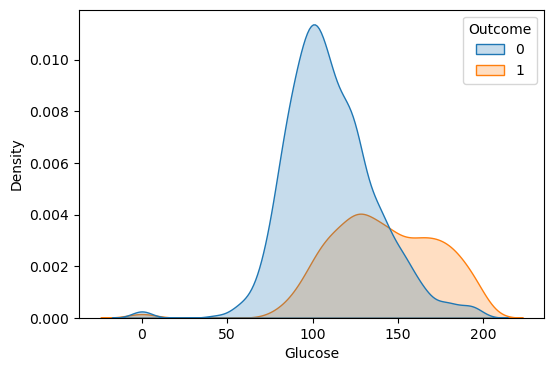

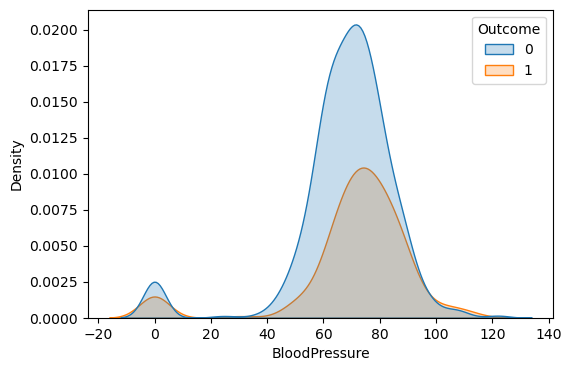

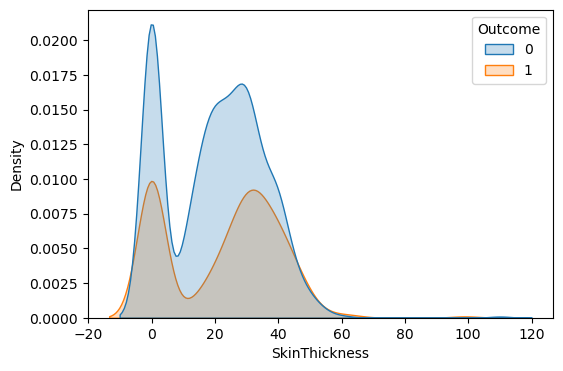

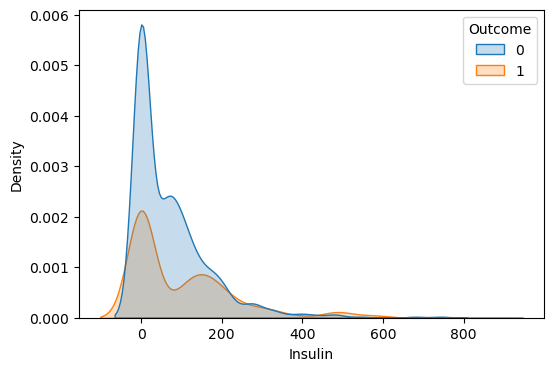

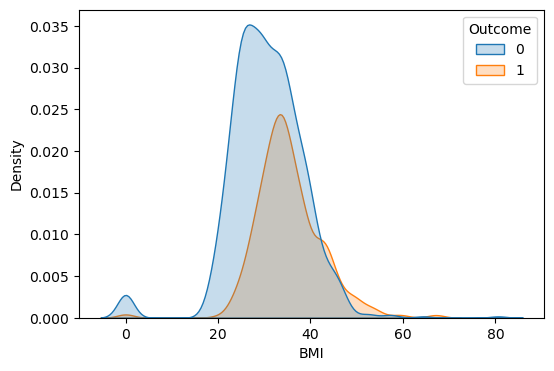

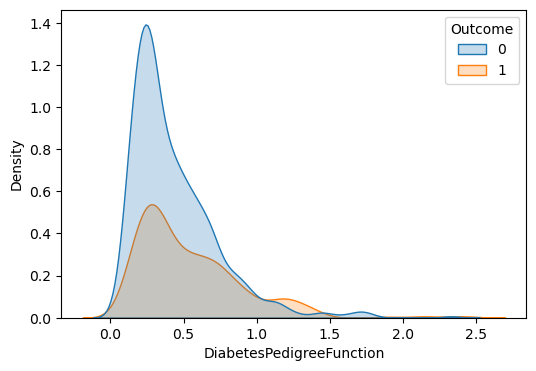

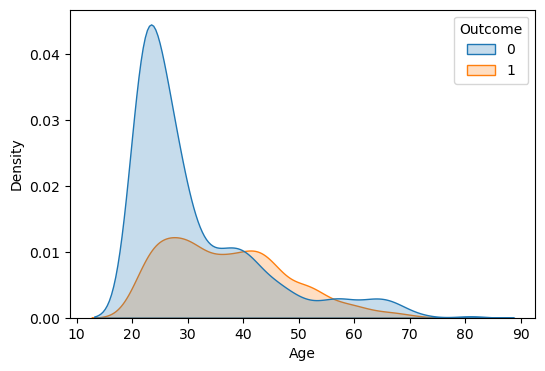

In [6]:
features = data.drop(['Outcome'], axis=1).columns

for feature in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data,x=feature,fill=True ,hue='Outcome')
    plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
features=data.drop(['Outcome'],axis=1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [9]:
target=pd.DataFrame(data.Outcome)
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
2763,0
2764,1
2765,0
2766,1


In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
import joblib
import warnings

In [13]:
model_results = pd.DataFrame(columns=[
"Model","Train_Acc","Test_Acc",
"Train_Prec","Test_Prec",
"Train_Rec","Test_Rec",
"Train_F1","Test_F1" ])

In [14]:
def clasicalmodels(model,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
    warnings.filterwarnings('ignore')
    model.fit(xtrain, ytrain)
    warnings.filterwarnings('ignore')
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    print(model,':')

    tr_acc = accuracy_score(ytrain, ypred_train)
    te_acc = accuracy_score(ytest, ypred_test)
    tr_p = precision_score(ytrain, ypred_train, average="weighted")
    te_p = precision_score(ytest, ypred_test, average="weighted")
    tr_r = recall_score(ytrain, ypred_train, average="weighted")
    te_r = recall_score(ytest, ypred_test, average="weighted")
    tr_f = f1_score(ytrain, ypred_train, average="weighted")
    te_f = f1_score(ytest, ypred_test, average="weighted")
    
    print(f"Train Accuracy : {tr_acc:.4f}")
    print(f"Test  Accuracy : {te_acc:.4f}")
    print(f"Train Precision: {tr_p:.4f}")
    print(f"Test  Precision: {te_p:.4f}")
    print(f"Train Recall   : {tr_r:.4f}")
    print(f"Test  Recall   : {te_r:.4f}")    
    print(f"Train F1 Score : {tr_f:.4f}")
    print(f"Test  F1 Score : {te_f:.4f}")

    model_results.loc[len(model_results)] = [model.__class__.__name__,tr_acc,te_acc,tr_p, te_p, tr_r, te_r, tr_f, te_f]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(confusion_matrix(ytrain, ypred_train),annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
    axes[0].set_title("Train Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(ytest, ypred_test),annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
    axes[1].set_title("Test Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    plt.show()
        
    from pathlib import Path
    root=Path("models")
    root.mkdir(exist_ok=True)
    path = root / f"{str(model.__class__.__name__)}.pkl"
    joblib.dump(model, path)

    return model
        

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42) :
Train Accuracy : 0.8446
Test  Accuracy : 0.8466
Train Precision: 0.8430
Test  Precision: 0.8448
Train Recall   : 0.8446
Test  Recall   : 0.8466
Train F1 Score : 0.8414
Test  F1 Score : 0.8430


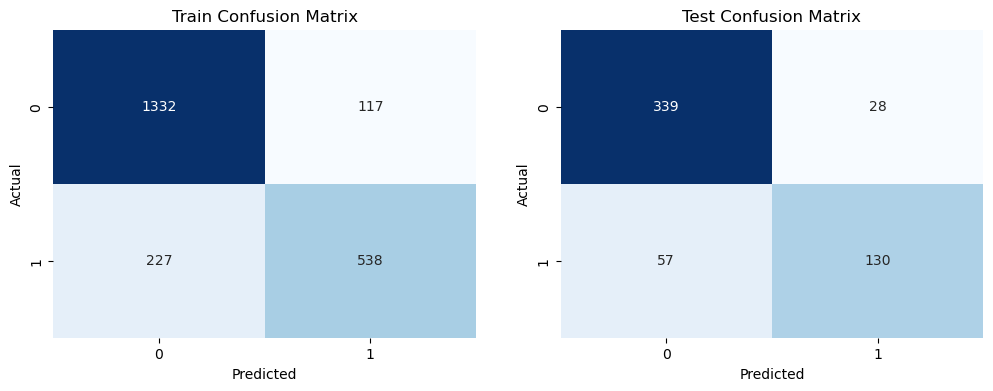

In [15]:
# DecisionTreeClassifier
decitree=clasicalmodels(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,random_state=42))

LogisticRegression(max_iter=5000, random_state=86) :
Train Accuracy : 0.7841
Test  Accuracy : 0.7744
Train Precision: 0.7796
Test  Precision: 0.7689
Train Recall   : 0.7841
Test  Recall   : 0.7744
Train F1 Score : 0.7766
Test  F1 Score : 0.7633


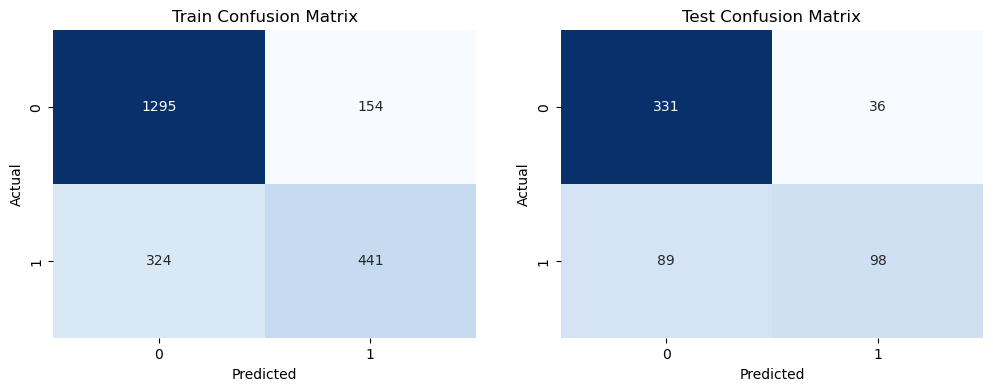

In [16]:
# LogisticRegression
warnings.filterwarnings('ignore')
logcls=clasicalmodels(LogisticRegression(max_iter=5000,random_state=86))

KNeighborsClassifier(n_neighbors=6) :
Train Accuracy : 0.8902
Test  Accuracy : 0.8159
Train Precision: 0.8954
Test  Precision: 0.8135
Train Recall   : 0.8902
Test  Recall   : 0.8159
Train F1 Score : 0.8864
Test  F1 Score : 0.8092


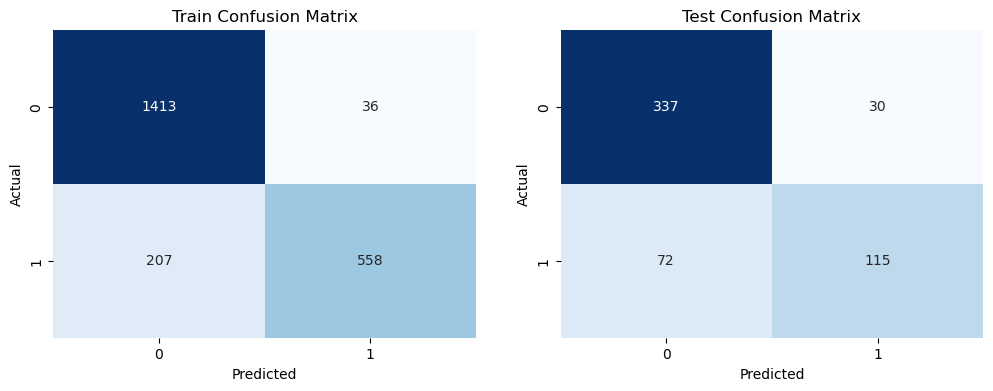

In [17]:
# KNeighborsClassifier
warnings.filterwarnings('ignore')
knc=clasicalmodels(KNeighborsClassifier(n_neighbors=6))
warnings.filterwarnings('ignore')

GaussianNB() :
Train Accuracy : 0.7669
Test  Accuracy : 0.7690
Train Precision: 0.7621
Test  Precision: 0.7636
Train Recall   : 0.7669
Test  Recall   : 0.7690
Train F1 Score : 0.7632
Test  F1 Score : 0.7647


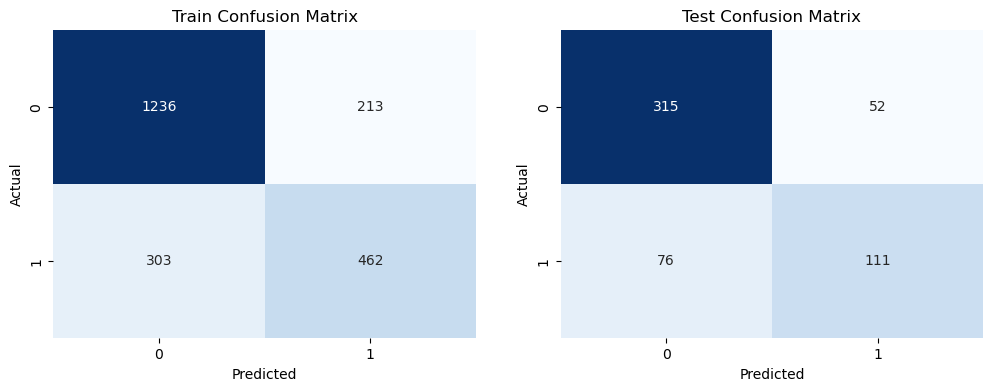

In [18]:
# GaussianNB
warnings.filterwarnings('ignore')
gauss=clasicalmodels(GaussianNB())

In [19]:
# BaggingClassifier

In [20]:
def clasicalmodels(model,pathname,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    print(model,':')
    
    tr_acc = accuracy_score(ytrain, ypred_train)
    te_acc = accuracy_score(ytest, ypred_test)
    tr_p = precision_score(ytrain, ypred_train, average="weighted")
    te_p = precision_score(ytest, ypred_test, average="weighted")
    tr_r = recall_score(ytrain, ypred_train, average="weighted")
    te_r = recall_score(ytest, ypred_test, average="weighted")
    tr_f = f1_score(ytrain, ypred_train, average="weighted")
    te_f = f1_score(ytest, ypred_test, average="weighted")
    
    print(f"Train Accuracy : {tr_acc:.4f}")
    print(f"Test  Accuracy : {te_acc:.4f}")
    print(f"Train Precision: {tr_p:.4f}")
    print(f"Test  Precision: {te_p:.4f}")
    print(f"Train Recall   : {tr_r:.4f}")
    print(f"Test  Recall   : {te_r:.4f}")    
    print(f"Train F1 Score : {tr_f:.4f}")
    print(f"Test  F1 Score : {te_f:.4f}")

    model_results.loc[len(model_results)] = [pathname,tr_acc,te_acc,tr_p, te_p, tr_r, te_r, tr_f, te_f]


    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(confusion_matrix(ytrain, ypred_train),annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
    axes[0].set_title("Train Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(ytest, ypred_test),annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
    axes[1].set_title("Test Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    plt.show()
        
    from pathlib import Path
    root=Path("models")
    root.mkdir(exist_ok=True)
    path = root / f"{str(pathname)}.pkl"
    joblib.dump(model, path)

    return model
        

BaggingClassifier(estimator=LogisticRegression(max_iter=5000, random_state=86),
                  n_estimators=15) :
Train Accuracy : 0.7850
Test  Accuracy : 0.7762
Train Precision: 0.7804
Test  Precision: 0.7706
Train Recall   : 0.7850
Test  Recall   : 0.7762
Train F1 Score : 0.7783
Test  F1 Score : 0.7660


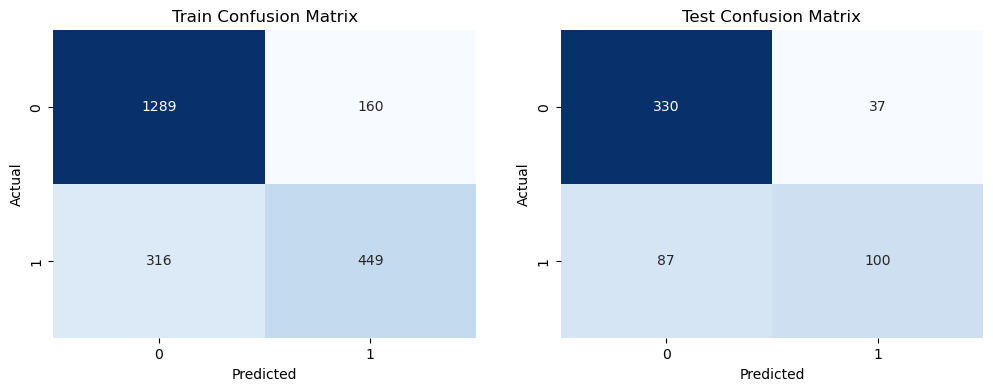

In [21]:
# BaggingClassifier with LogisticRegression
warnings.filterwarnings('ignore')
bag_logr=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=logcls),'BaggingClassifier_LogisticRegression')

AdaBoostClassifier(learning_rate=0.5, n_estimators=25, random_state=42) :
Train Accuracy : 0.7836
Test  Accuracy : 0.7852
Train Precision: 0.7788
Test  Precision: 0.7801
Train Recall   : 0.7836
Test  Recall   : 0.7852
Train F1 Score : 0.7779
Test  F1 Score : 0.7803


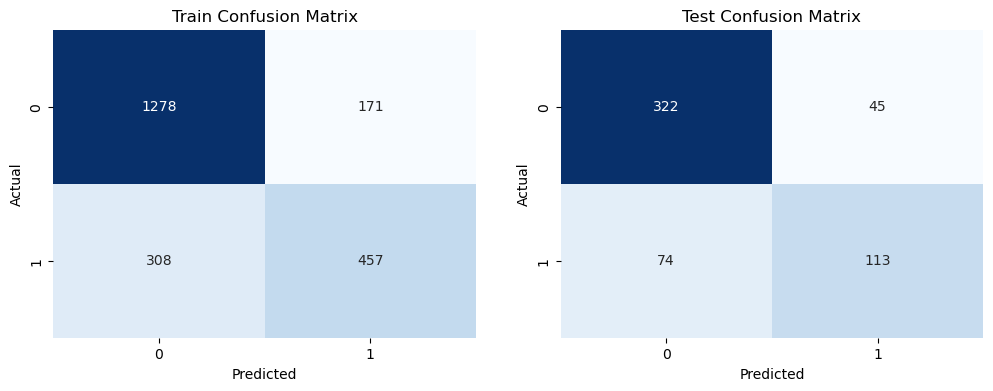

In [22]:
# AdaBoostClassifier
warnings.filterwarnings('ignore')
adaboost=clasicalmodels(AdaBoostClassifier(n_estimators=25,learning_rate=0.5,random_state=42),'AdaBoostClassifier')

LinearDiscriminantAnalysis() :
Train Accuracy : 0.7814
Test  Accuracy : 0.7744
Train Precision: 0.7766
Test  Precision: 0.7689
Train Recall   : 0.7814
Test  Recall   : 0.7744
Train F1 Score : 0.7738
Test  F1 Score : 0.7633


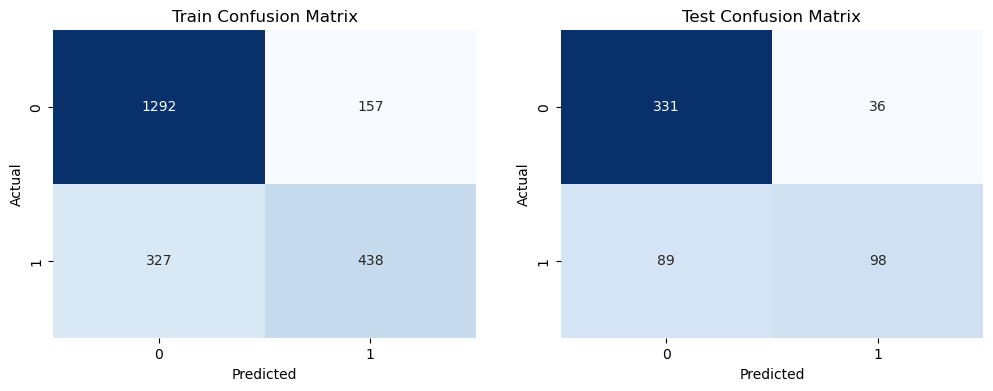

In [23]:
# LinearDiscriminantAnalysis
warnings.filterwarnings('ignore')
bag_gauss=clasicalmodels(LinearDiscriminantAnalysis(),'LinearDiscriminantAnalysis')

In [24]:
model_results

,Model,Train_Acc,Test_Acc,Train_Prec,Test_Prec,Train_Rec,Test_Rec,Train_F1,Test_F1
0,DecisionTreeClassifier,0.844625,0.846570,0.842985,0.844829,0.844625,0.846570,0.841448,0.843038
1,LogisticRegression,0.784101,0.774368,0.779594,0.768939,0.784101,0.774368,0.776589,0.763339
2,KNeighborsClassifier,0.890244,0.815884,0.895432,0.813545,0.890244,0.815884,0.886396,0.809221
3,GaussianNB,0.766938,0.768953,0.762114,0.763553,0.766938,0.768953,0.763164,0.764689
4,BaggingClassifier_LogisticRegression,0.785005,0.776173,0.780365,0.770628,0.785005,0.776173,0.778291,0.766040
5,AdaBoostClassifier,0.783650,0.785199,0.778817,0.780072,0.783650,0.785199,0.777894,0.780253
6,LinearDiscriminantAnalysis,0.781391,0.774368,0.776639,0.768939,0.781391,0.774368,0.773785,0.763339


In [25]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [26]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [27]:
class FFN(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(8, 128),
            nn.ReLU(),

            nn.Linear(128, 256),
            nn.ReLU(),

            nn.Linear(256, 512),
            nn.ReLU(),

            nn.Linear(512, 512),
            nn.ReLU(),

            nn.Linear(512, 256),
            nn.ReLU(),

            nn.Linear(256, 128),
            nn.ReLU(),

            nn.Linear(128, 2)
        )

    def forward(self, x):
        return self.net(x)


In [28]:
FNN_model = FFN()
FNN_model.to(device)

FFN(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): ReLU()
    (10): Linear(in_features=256, out_features=128, bias=True)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [29]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values.squeeze(), dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [30]:
train_dataset = CustomDataset(xtrain,ytrain)

In [31]:
test_dataset = CustomDataset(xtest,ytest)

In [32]:
train_dataloader = DataLoader(train_dataset, batch_size=30, shuffle=True)

In [33]:
test_dataloader = DataLoader(test_dataset, batch_size=30, shuffle=True)

In [34]:
def accuracy_fn(y_true, y_pred):
    return (y_true == y_pred).sum().item() / len(y_true)

In [35]:
def train(model, epochs, train_dataloader=train_dataloader, device=device):
    torch.cuda.manual_seed_all(33)

    for epoch in range(epochs):
        model.train()
        avg_loss = 0.0
        avg_acc  = 0.0

        for step, (x, y) in enumerate(train_dataloader):
            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            logits = model(x)              # shape: [B, 2]
            loss = loss_fn(logits, y)      # y: [B] with 0/1

            loss.backward()
            optimizer.step()

            preds = logits.argmax(dim=1)   # NO softmax
            acc = accuracy_fn(y, preds)

            avg_loss += loss.item()
            avg_acc  += acc

        avg_loss /= (step + 1)
        avg_acc  /= (step + 1)

        print(f"Epoch {epoch} | Avg Loss {avg_loss:.4f} | Avg Acc {avg_acc:.4f}")


In [36]:
loss_fn = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(FNN_model.parameters(), lr=0.00001)

In [37]:
train(model=FNN_model,epochs=300)

Epoch 0 | Avg Loss 0.6901 | Avg Acc 0.5755
Epoch 1 | Avg Loss 0.6570 | Avg Acc 0.6552
Epoch 2 | Avg Loss 0.6410 | Avg Acc 0.6492
Epoch 3 | Avg Loss 0.6277 | Avg Acc 0.6562
Epoch 4 | Avg Loss 0.6157 | Avg Acc 0.6725
Epoch 5 | Avg Loss 0.6065 | Avg Acc 0.6870
Epoch 6 | Avg Loss 0.5997 | Avg Acc 0.6890
Epoch 7 | Avg Loss 0.5963 | Avg Acc 0.6834
Epoch 8 | Avg Loss 0.5896 | Avg Acc 0.6929
Epoch 9 | Avg Loss 0.5853 | Avg Acc 0.6894
Epoch 10 | Avg Loss 0.5833 | Avg Acc 0.6952
Epoch 11 | Avg Loss 0.5780 | Avg Acc 0.7044
Epoch 12 | Avg Loss 0.5752 | Avg Acc 0.6944
Epoch 13 | Avg Loss 0.5701 | Avg Acc 0.7111
Epoch 14 | Avg Loss 0.5690 | Avg Acc 0.7063
Epoch 15 | Avg Loss 0.5684 | Avg Acc 0.7116
Epoch 16 | Avg Loss 0.5638 | Avg Acc 0.7109
Epoch 17 | Avg Loss 0.5621 | Avg Acc 0.7157
Epoch 18 | Avg Loss 0.5576 | Avg Acc 0.7224
Epoch 19 | Avg Loss 0.5570 | Avg Acc 0.7270
Epoch 20 | Avg Loss 0.5527 | Avg Acc 0.7229
Epoch 21 | Avg Loss 0.5524 | Avg Acc 0.7266
Epoch 22 | Avg Loss 0.5506 | Avg Acc 0.726

In [38]:
xtrain = torch.tensor(xtrain.values, dtype=torch.float32)
xtest  = torch.tensor(xtest.values,  dtype=torch.float32)
ytrain = torch.tensor(ytrain.values, dtype=torch.long)
ytest  = torch.tensor(ytest.values,  dtype=torch.long)

In [39]:
xtrain = xtrain.to(device)
ytrain = ytrain.to(device)
xtest = xtest.to(device)
ytest = ytest.to(device)


In [40]:
def evaluate_model(model, loader, device):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            p = model(x).argmax(1)
            y_true.extend(y.cpu())
            y_pred.extend(p.cpu())
    y_true, y_pred = torch.tensor(y_true), torch.tensor(y_pred)
    return {
        "acc": (y_true == y_pred).float().mean().item(),
        "precision": precision_score(y_true, y_pred, average="weighted"),
        "recall": recall_score(y_true, y_pred, average="weighted"),
        "f1": f1_score(y_true, y_pred, average="weighted"),
        "cm": confusion_matrix(y_true, y_pred)
    }


In [41]:
def plot_cm_and_store(model, train_loader, test_loader, device, model_results, name="FFN"):
    tr = evaluate_model(model, train_loader, device)
    te = evaluate_model(model, test_loader, device)

    print("Train Accuracy :", tr["acc"])
    print("Test  Accuracy :", te["acc"])
    print("Train Precision:", tr["precision"])
    print("Test  Precision:", te["precision"])
    print("Train Recall   :", tr["recall"])
    print("Test  Recall   :", te["recall"])
    print("Train F1-score :", tr["f1"])
    print("Test  F1-score :", te["f1"])

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.heatmap(tr["cm"], annot=True, fmt="d", ax=ax[0], cbar=False)
    ax[0].set_title(f"Train Acc = {tr['acc']:.3f}")
    sns.heatmap(te["cm"], annot=True, fmt="d", ax=ax[1], cbar=False)
    ax[1].set_title(f"Test Acc = {te['acc']:.3f}")
    plt.tight_layout(); plt.show()

    model_results.loc[len(model_results)] = [
        name,
        tr["acc"], te["acc"],
        tr["precision"], te["precision"],
        tr["recall"], te["recall"],
        tr["f1"], te["f1"]
    ]


Train Accuracy : 0.9313459992408752
Test  Accuracy : 0.8916967511177063
Train Precision: 0.9310815674561536
Test  Precision: 0.8916967509025271
Train Recall   : 0.931345980126468
Test  Recall   : 0.8916967509025271
Train F1-score : 0.9309400135664943
Test  F1-score : 0.8916967509025271


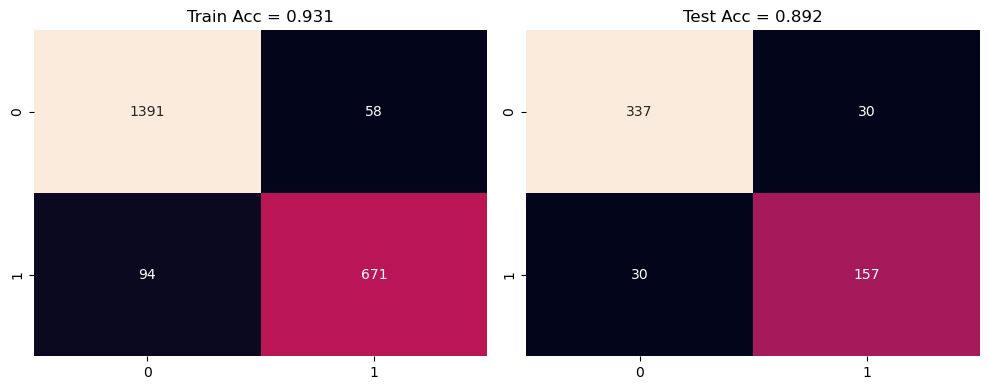

In [42]:
plot_cm_and_store(FNN_model, train_dataloader, test_dataloader, device,model_results)


In [43]:
model_results

,Model,Train_Acc,Test_Acc,Train_Prec,Test_Prec,Train_Rec,Test_Rec,Train_F1,Test_F1
0,DecisionTreeClassifier,0.844625,0.846570,0.842985,0.844829,0.844625,0.846570,0.841448,0.843038
1,LogisticRegression,0.784101,0.774368,0.779594,0.768939,0.784101,0.774368,0.776589,0.763339
2,KNeighborsClassifier,0.890244,0.815884,0.895432,0.813545,0.890244,0.815884,0.886396,0.809221
3,GaussianNB,0.766938,0.768953,0.762114,0.763553,0.766938,0.768953,0.763164,0.764689
4,BaggingClassifier_LogisticRegression,0.785005,0.776173,0.780365,0.770628,0.785005,0.776173,0.778291,0.766040
5,AdaBoostClassifier,0.783650,0.785199,0.778817,0.780072,0.783650,0.785199,0.777894,0.780253
6,LinearDiscriminantAnalysis,0.781391,0.774368,0.776639,0.768939,0.781391,0.774368,0.773785,0.763339
7,FFN,0.931346,0.891697,0.931082,0.891697,0.931346,0.891697,0.930940,0.891697


In [44]:
def plot_model_metrics1(df):
    metrics = ['Acc', 'Prec', 'Rec', 'F1']
    sns.set(style="whitegrid", font_scale=1.2)

    fig, axes = plt.subplots(2, 3, figsize=(32, 20))
    axes = axes.flatten()

    palette_train = ["#88ccee", "#44aa99"]  # soft cyan / turquoise
    palette_test  = ["#ddcc77", "#cc6677"]  # soft mustard / rose
    palette_summary = ["#fb9a99", "#e31a1c", "#fdbf6f"]  # pink / red / peach


    # 1-4
    for i, m in enumerate(metrics):
        df_long = df[['Model', f'Train_{m}', f'Test_{m}']].copy()
        df_long = df_long.melt('Model', var_name='Dataset', value_name='Score')
        df_long['Dataset'] = df_long['Dataset'].apply(lambda x: 'Train' if 'Train' in x else 'Test')

        sns.barplot(x='Model', y='Score', hue='Dataset', data=df_long,
                    palette=[palette_train[0], palette_test[0]], ax=axes[i])
        axes[i].set_title(f'{m} - Train vs Test', fontsize=16)
        axes[i].set_ylim(0, 1.05)
        axes[i].tick_params(axis='x', rotation=30)

    # 5
    summary_list = []
    for m in metrics:
        summary_list.append({
            'Metric': m,
            'Max': df[f'Train_{m}'].max(),
            'Min': df[f'Train_{m}'].min(),
            'Avg': df[f'Train_{m}'].mean()
        })
    summary_train = pd.DataFrame(summary_list).melt(id_vars='Metric',
                                                    var_name='Stat', value_name='Score')

    sns.barplot(x='Metric', y='Score', hue='Stat', data=summary_train,
                palette=palette_summary, ax=axes[4])
    axes[4].set_title('Train Summary (Max / Min / Avg)', fontsize=16)
    axes[4].set_ylim(0, 1.05)
    for container in axes[4].containers:  # annotate only summary
        axes[4].bar_label(container, fmt="%.3f", padding=3)

    # 6
    summary_list = []
    for m in metrics:
        summary_list.append({
            'Metric': m,
            'Max': df[f'Test_{m}'].max(),
            'Min': df[f'Test_{m}'].min(),
            'Avg': df[f'Test_{m}'].mean()
        })
    summary_test = pd.DataFrame(summary_list).melt(id_vars='Metric',
                                                   var_name='Stat', value_name='Score')

    sns.barplot(x='Metric', y='Score', hue='Stat', data=summary_test,
                palette=palette_summary, ax=axes[5])
    axes[5].set_title('Test Summary (Max / Min / Avg)', fontsize=16)
    axes[5].set_ylim(0, 1.05)
    for container in axes[5].containers:  # annotate only summary
        axes[5].bar_label(container, fmt="%.3f", padding=3)

    plt.tight_layout()
    plt.show()


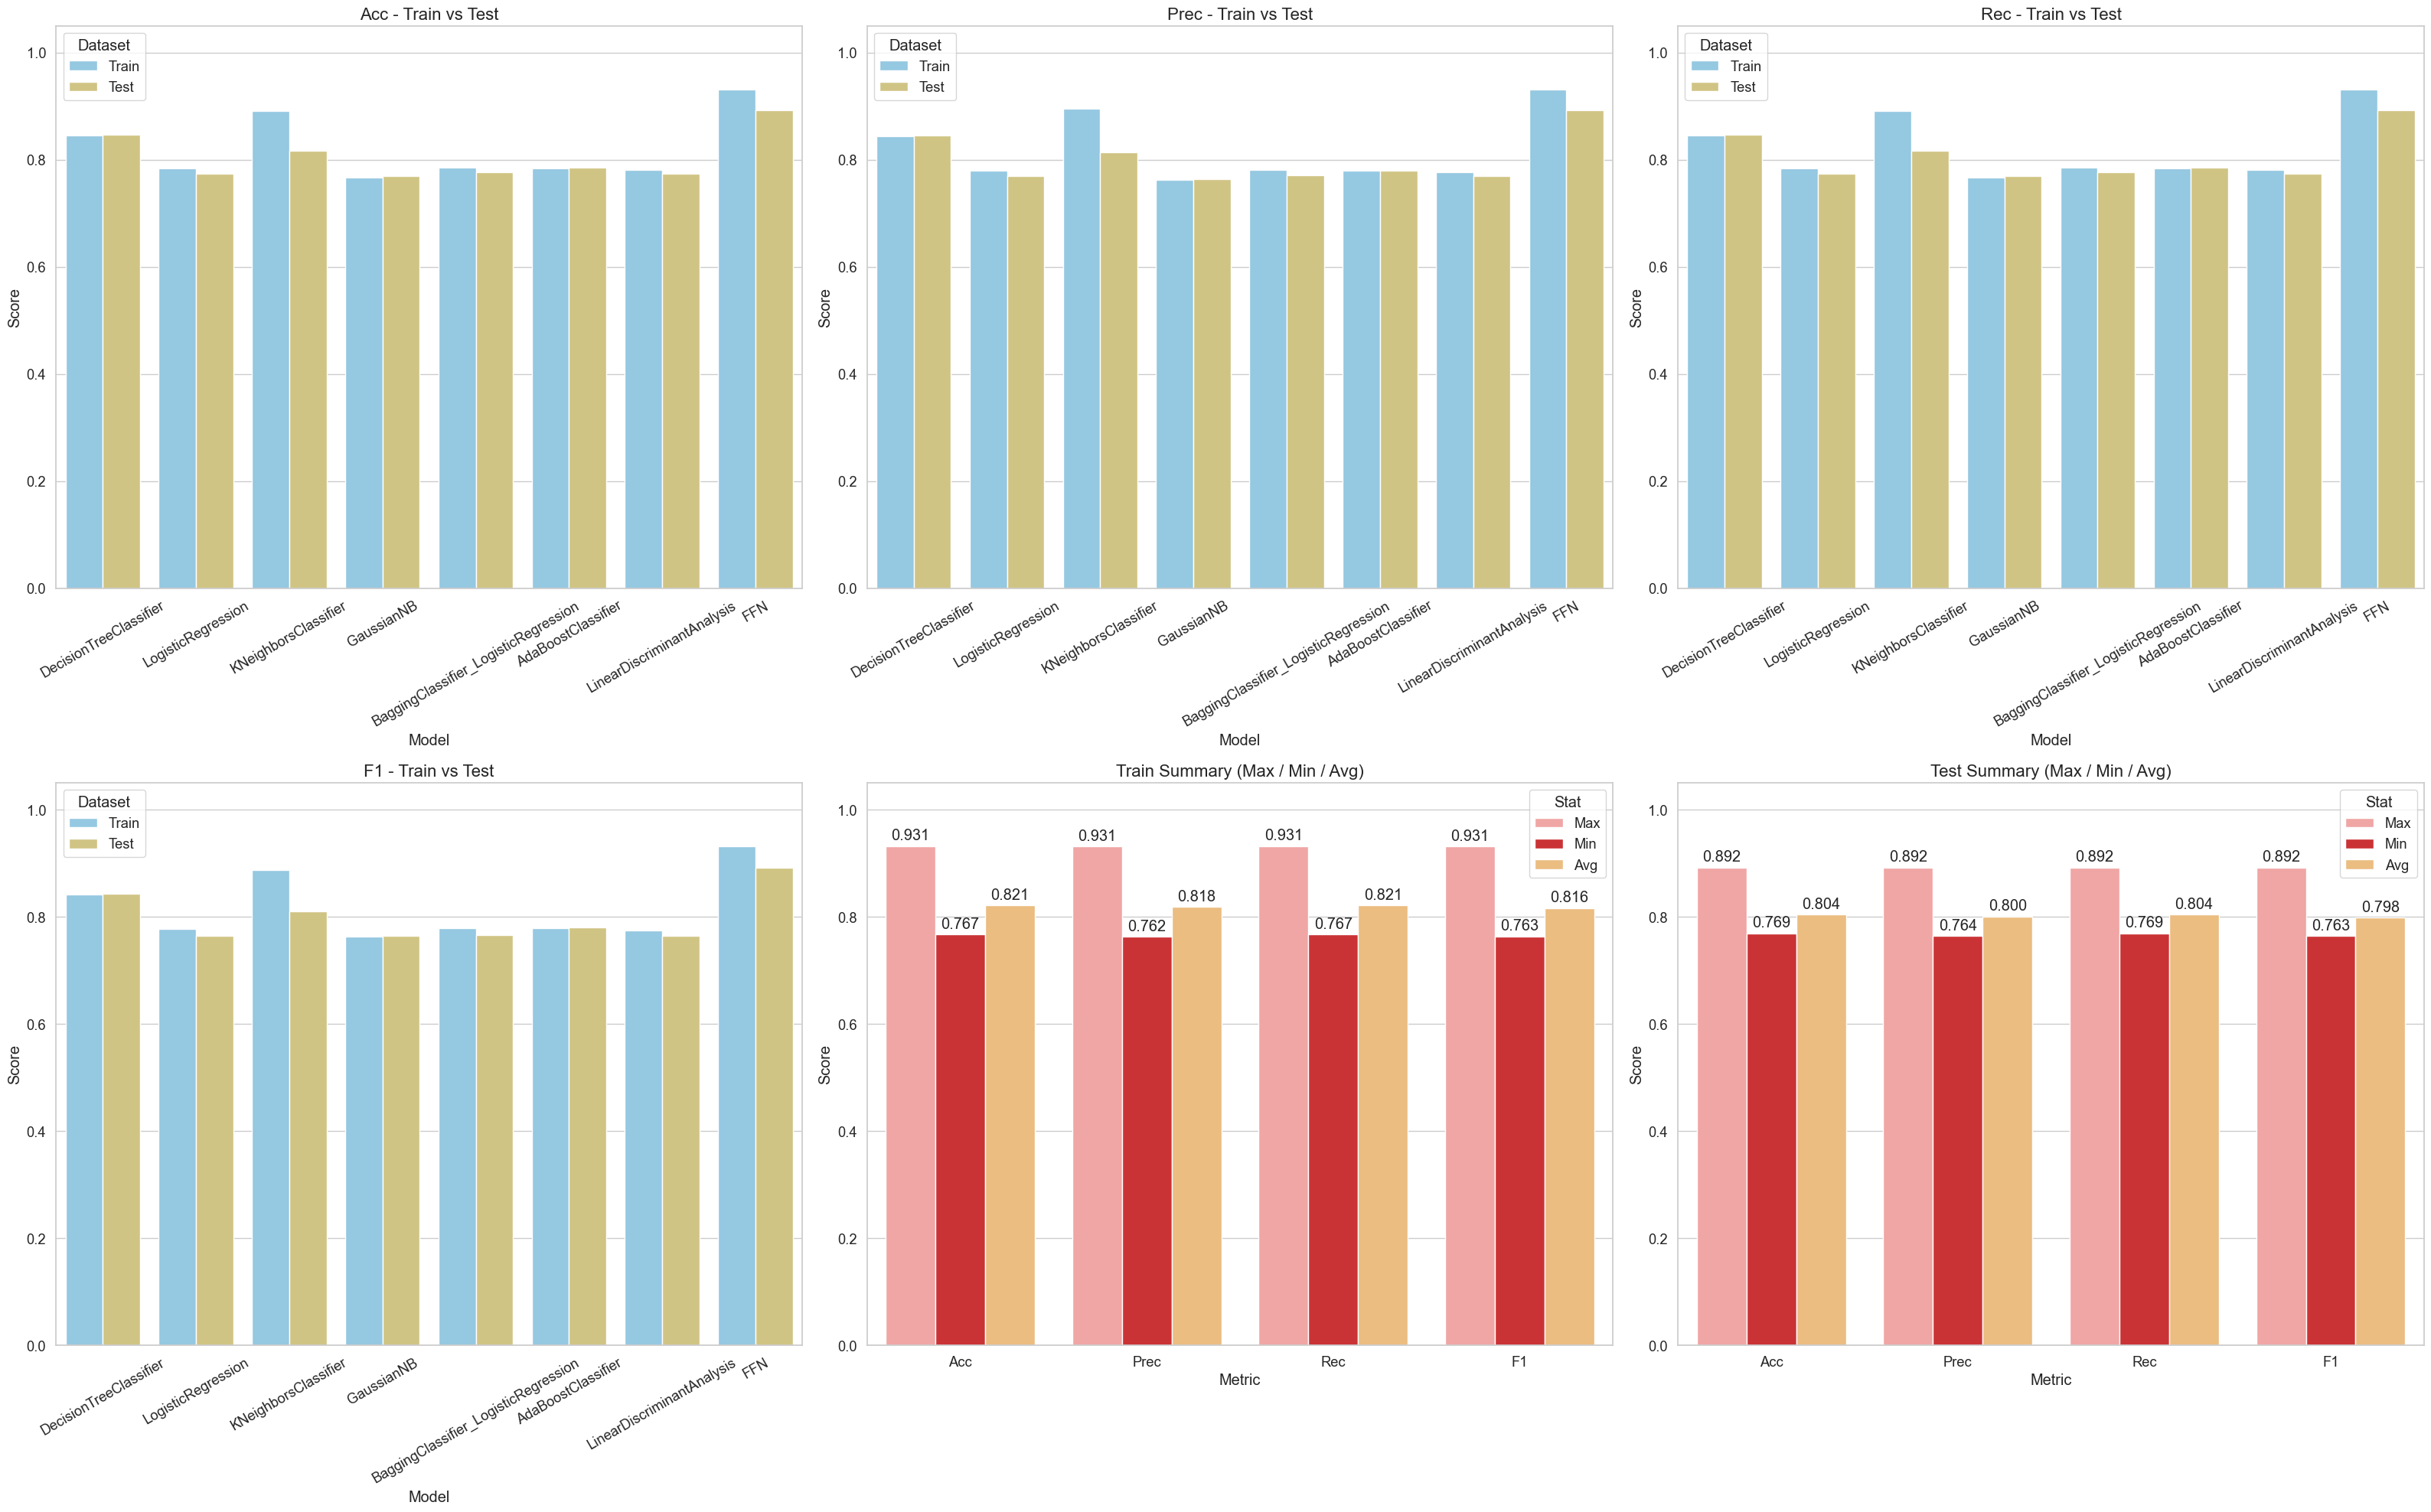

In [45]:
plot_model_metrics1(model_results)

In [46]:
def plot_model_metrics2(df):
    metrics = ['Acc', 'Prec', 'Rec', 'F1']
    sns.set(style="whitegrid", font_scale=1.2)

    palette_train = ["#88ccee", "#44aa99"]      # soft cyan / turquoise
    palette_test  = ["#ddcc77", "#cc6677"]      # soft mustard / rose
    palette_summary = ["#fb9a99", "#e31a1c", "#fdbf6f"]  # pink / red / peach

    # 1-4
    for m in metrics:
        df_long = df[['Model', f'Train_{m}', f'Test_{m}']].copy()
        df_long = df_long.melt('Model', var_name='Dataset', value_name='Score')
        df_long['Dataset'] = df_long['Dataset'].apply(lambda x: 'Train' if 'Train' in x else 'Test')

        plt.figure(figsize=(16, 8))
        sns.barplot(x='Model', y='Score', hue='Dataset', data=df_long,
                    palette=[palette_train[0], palette_test[0]])
        plt.title(f'{m} - Train vs Test', fontsize=18)
        plt.ylim(0, 1.05)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    # 5
    summary_list = []
    for m in metrics:
        summary_list.append({
            'Metric': m,
            'Max': df[f'Train_{m}'].max(),
            'Min': df[f'Train_{m}'].min(),
            'Avg': df[f'Train_{m}'].mean()
        })
    summary_train = pd.DataFrame(summary_list).melt(id_vars='Metric',
                                                    var_name='Stat', value_name='Score')

    plt.figure(figsize=(16, 8))
    sns.barplot(x='Metric', y='Score', hue='Stat', data=summary_train,
                palette=palette_summary)
    plt.title('Train Summary (Max / Min / Avg)', fontsize=18)
    plt.ylim(0, 1.05)
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt="%.3f", padding=3)
    plt.tight_layout()
    plt.show()

    # 6
    summary_list = []
    for m in metrics:
        summary_list.append({
            'Metric': m,
            'Max': df[f'Test_{m}'].max(),
            'Min': df[f'Test_{m}'].min(),
            'Avg': df[f'Test_{m}'].mean()
        })
    summary_test = pd.DataFrame(summary_list).melt(id_vars='Metric',
                                                   var_name='Stat', value_name='Score')

    plt.figure(figsize=(16, 8))
    sns.barplot(x='Metric', y='Score', hue='Stat', data=summary_test,
                palette=palette_summary)
    plt.title('Test Summary (Max / Min / Avg)', fontsize=18)
    plt.ylim(0, 1.05)
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt="%.3f", padding=3)
    plt.tight_layout()
    plt.show()


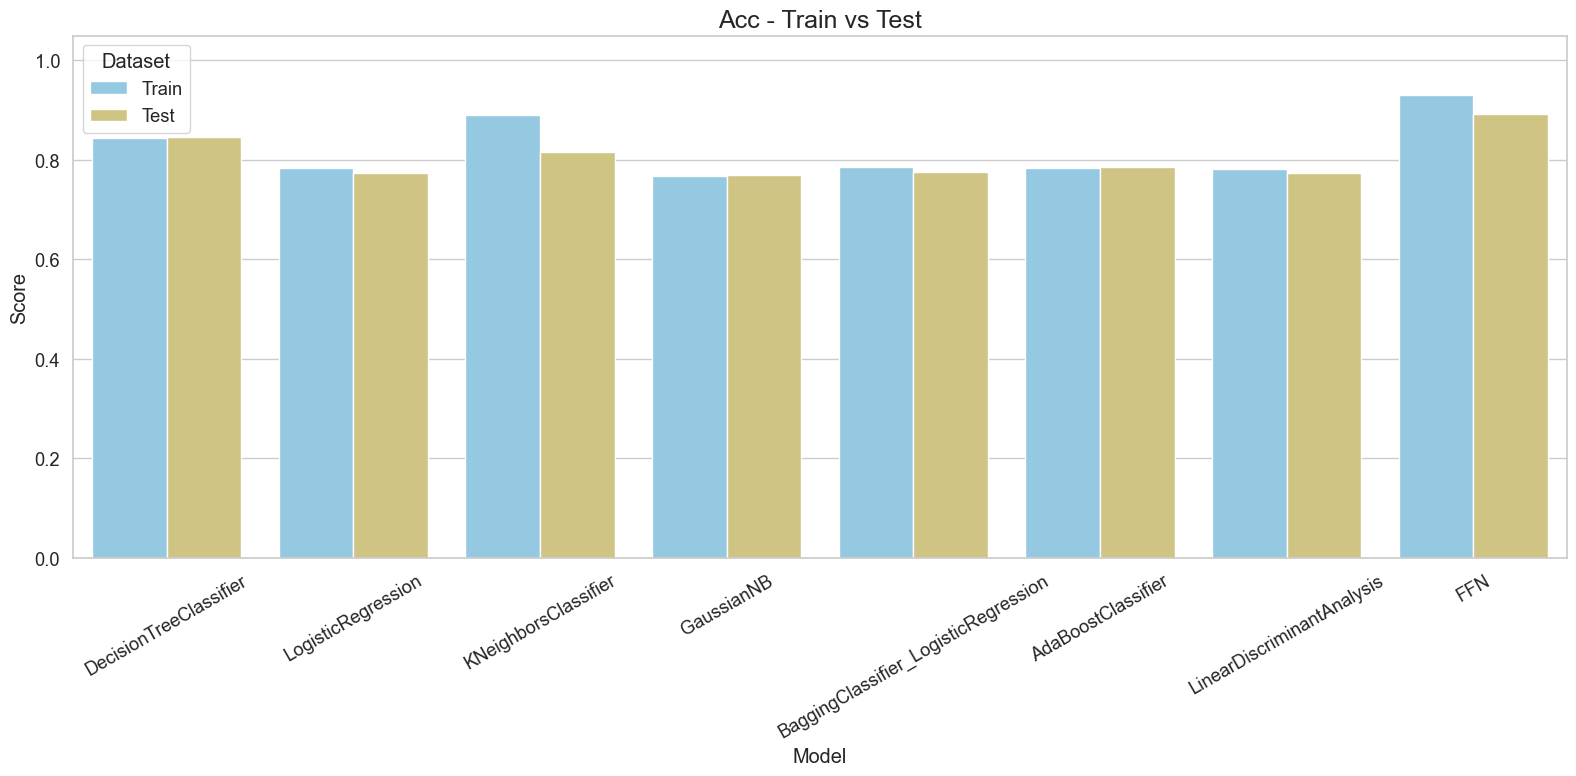

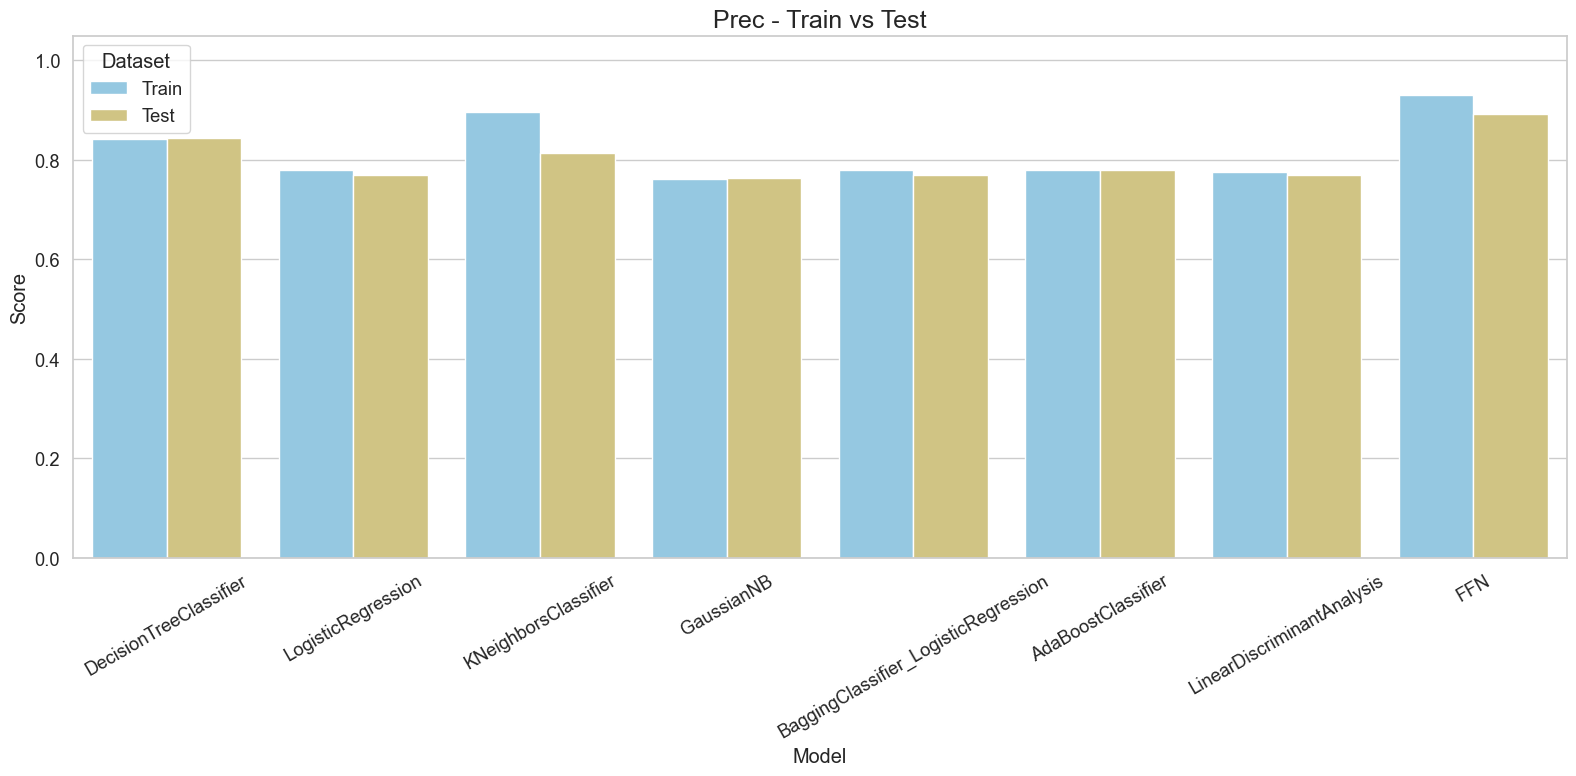

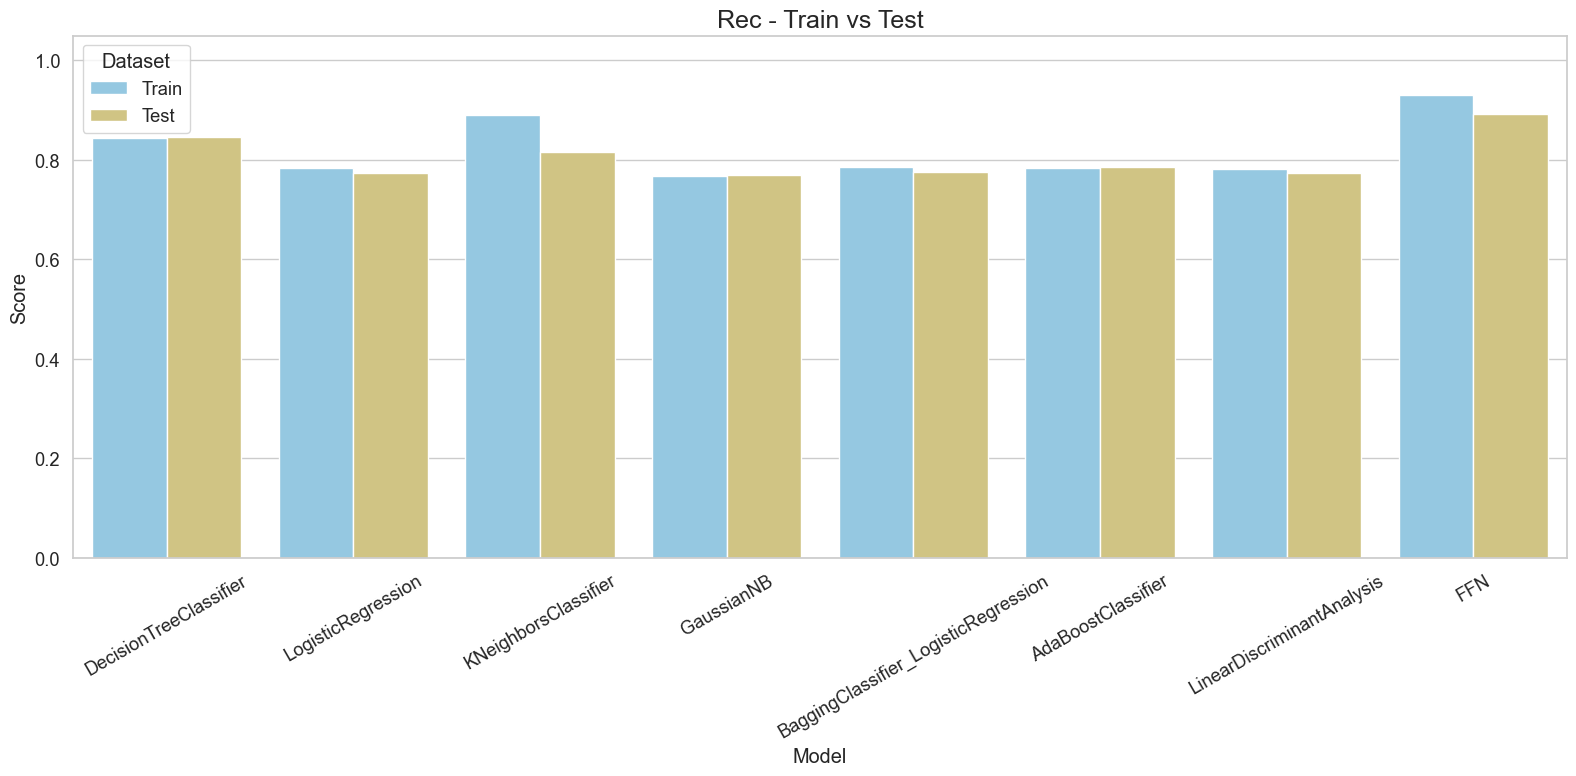

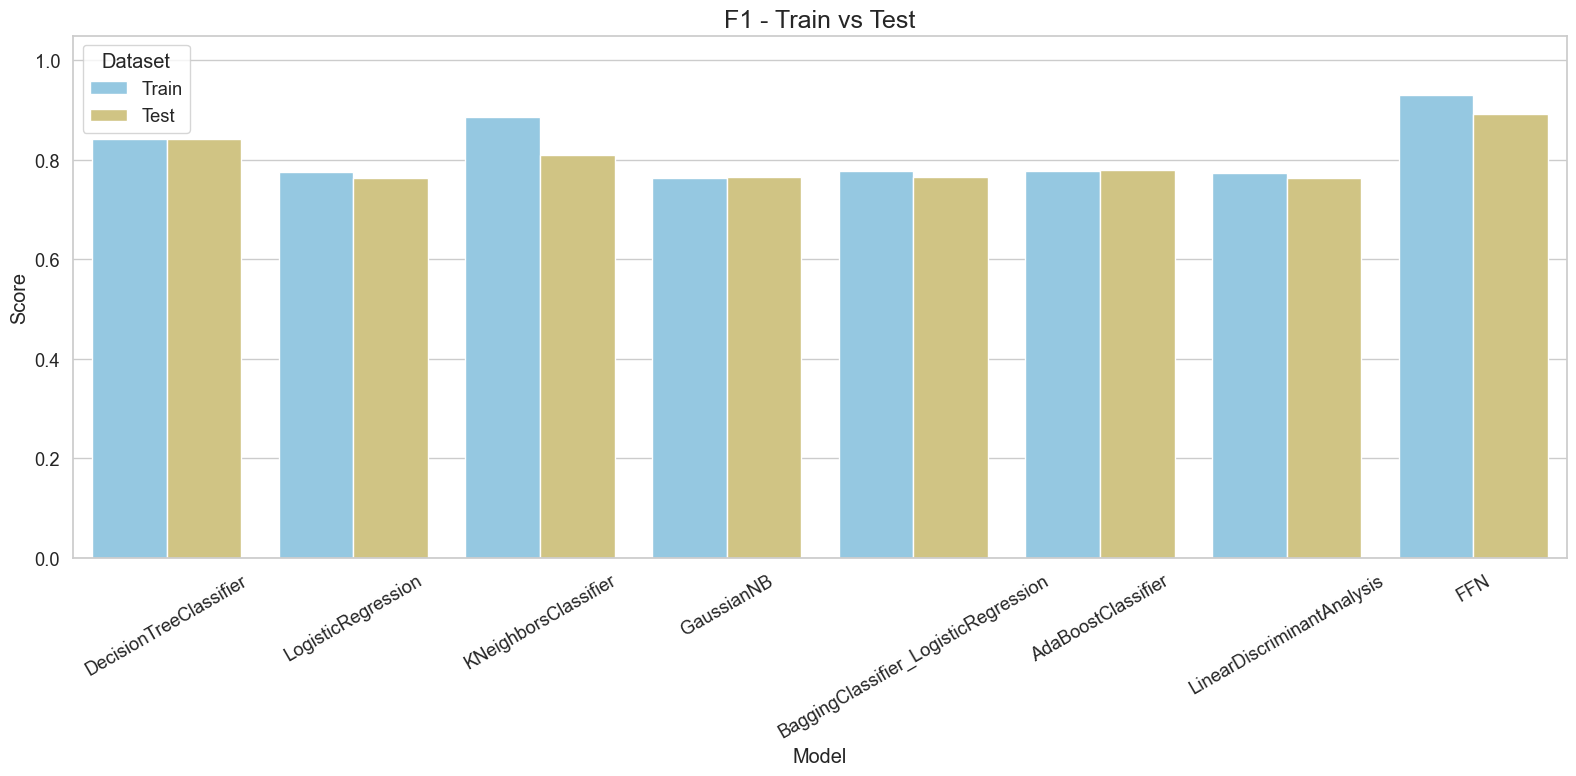

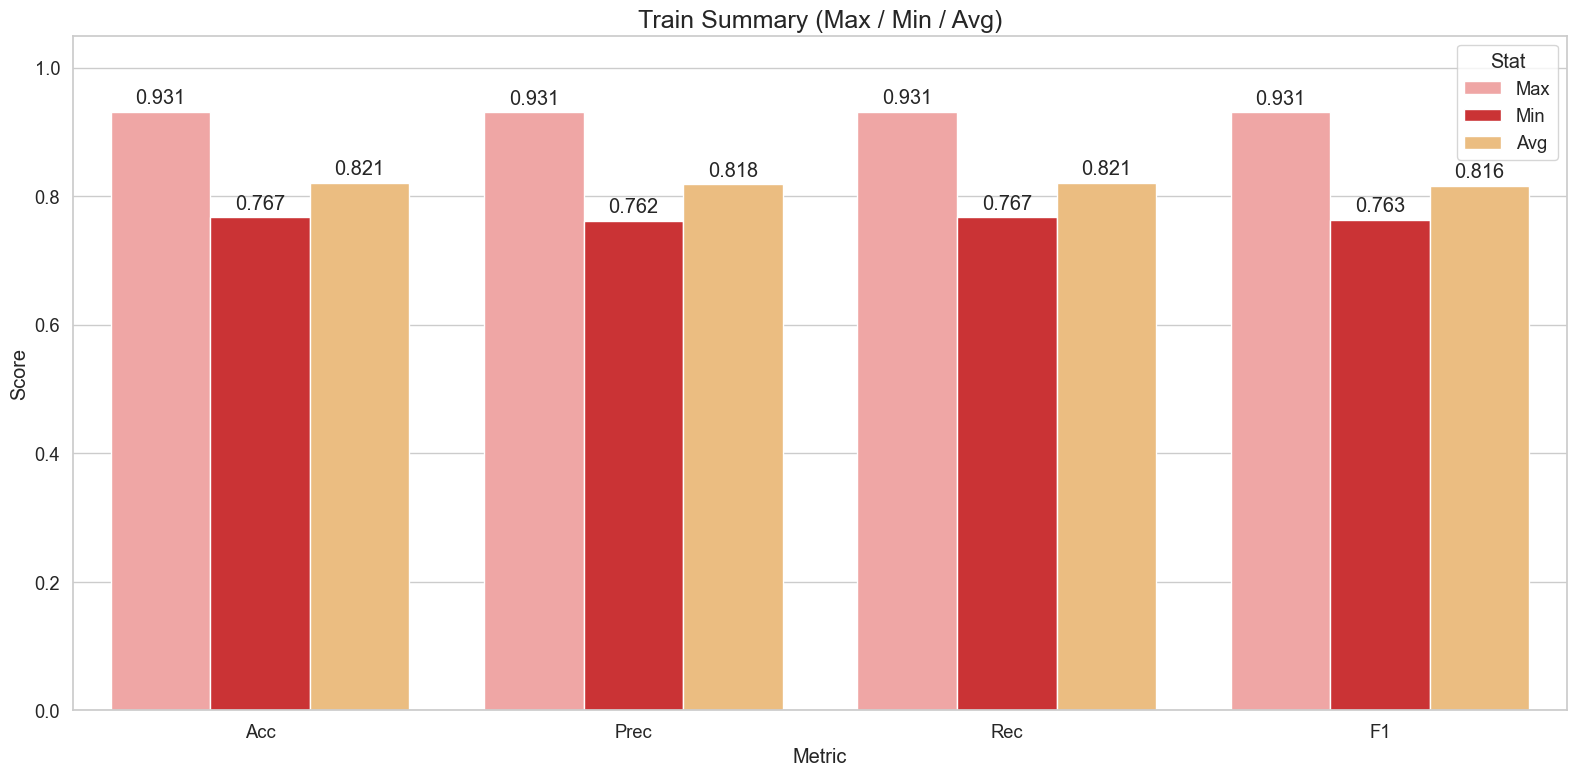

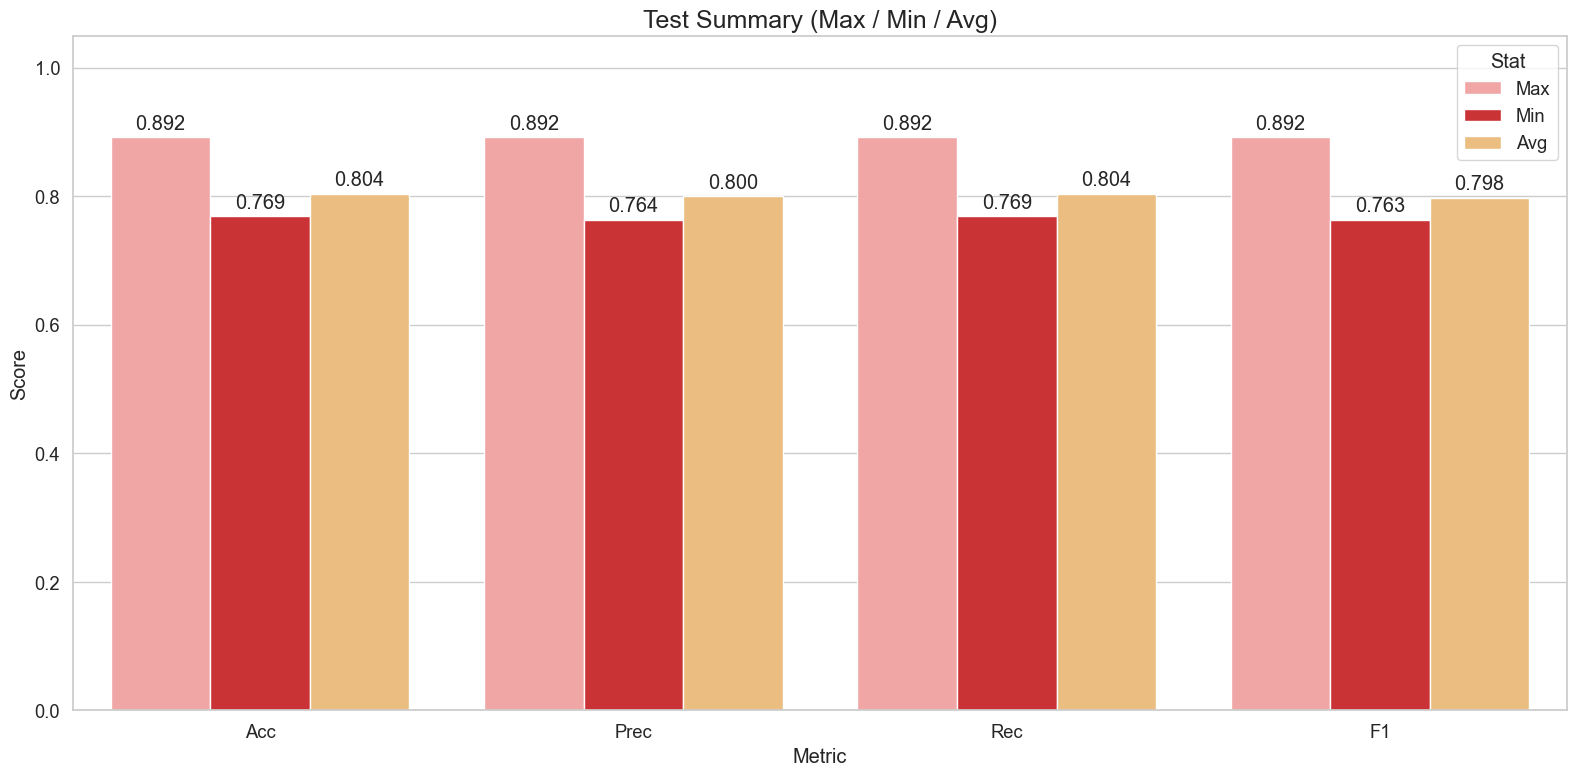

In [47]:
plot_model_metrics2(model_results)

In [48]:
def pred_fn(model_path):
    import numpy as np
    from joblib import load

    model = load(model_path)

    Pregnancies = int(input("Pregnancies: "))
    Glucose = float(input("Glucose: "))
    BloodPressure = float(input("Blood Pressure: "))
    SkinThickness = float(input("Skin Thickness: "))
    Insulin = float(input("Insulin: "))
    BMI = float(input("BMI: "))
    DiabetesPedigreeFunction = float(input("Diabetes Pedigree Function: "))
    Age = int(input("Age: "))

    feat = np.array([
        Pregnancies,
        Glucose,
        BloodPressure,
        SkinThickness,
        Insulin,
        BMI,
        DiabetesPedigreeFunction,
        Age
    ], dtype=float).reshape(1, -1)

    resdict = {
        0: "You do not have Diabetes",
        1: "You have Diabetes"
    }

    pred = model.predict(feat)[0]
    print("\nPrediction:", resdict[int(pred)], "\n")

    return pred


In [49]:
from pathlib import Path 
root=Path('models')
root.mkdir(exist_ok=True)
path = root / 'RandomForestClassifier.pkl'

In [ ]:
6	148	72	35	0	33.6	0.627	50   1

In [ ]:
pred_fn(model_path=path)